### In the below notebook, we do some initial EDA to initially look at which types of features likely correlate well to sale price. 
### We then clean the data by dealing with null values as there are many columns with missing data. We discuss this below, but in most cases, we assume that nulls correlate to the absence of a particular feature, which in most cases is non-mandatory, such as a basement, garage, or pool. We therefore replace with 'None' or zero for related square footage for example.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


# EDA

Let's do some initial EDA, starting with target variable, house price. We cen see that house prices are right skewed, which is largely what we would expect.

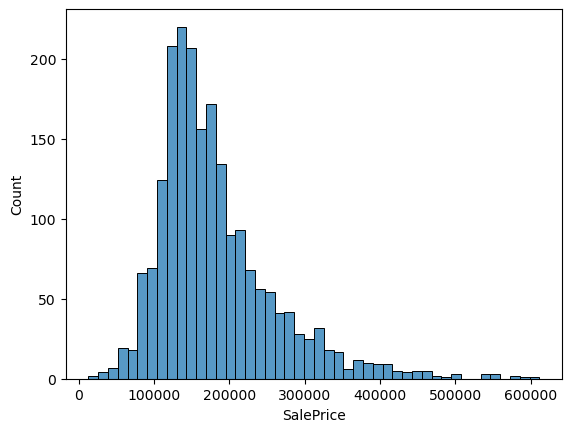

In [21]:
sns.histplot(df['SalePrice'])
plt.savefig('sale_price_histogram.png')
plt.show()

Let's investigate some high likelihood features which likely correlate well to price.

Text(0, 0.5, 'Sale Price')

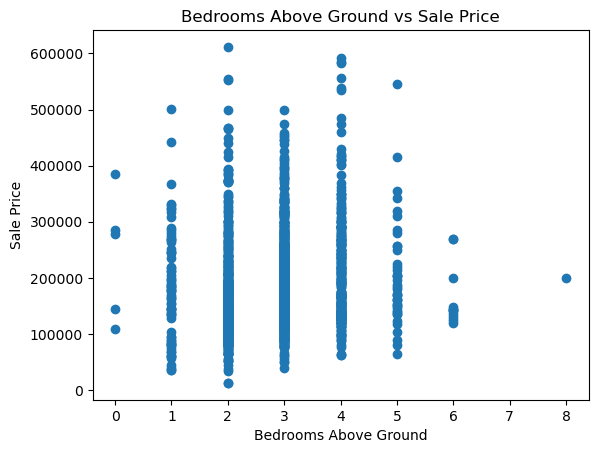

In [5]:
plt.scatter(df['Bedroom AbvGr'], df['SalePrice'])
plt.title('Bedrooms Above Ground vs Sale Price')
plt.xlabel('Bedrooms Above Ground')
plt.ylabel('Sale Price')

/Users/stevegoulden/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sale Price')

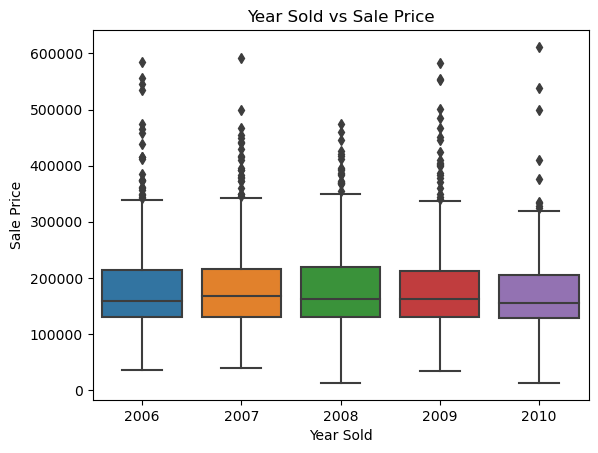

In [6]:
sns.boxplot(df['Yr Sold'], df['SalePrice'])
plt.title('Year Sold vs Sale Price')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')

In [7]:
df.groupby('Yr Sold')['SalePrice'].mean()

Yr Sold
2006    179471.609589
2007    185524.514056
2008    181750.372414
2009    182455.244395
2010    174180.059829
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='Gr Liv Area', ylabel='Count'>

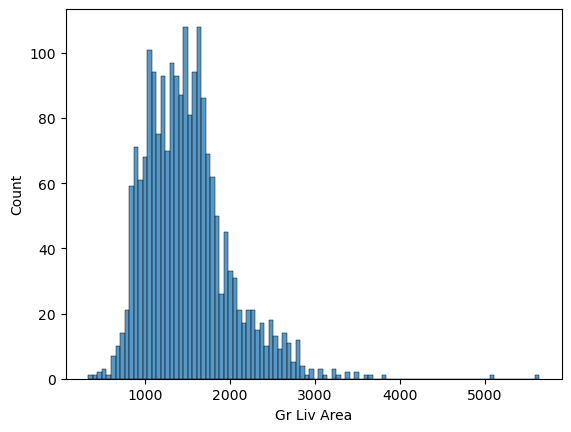

In [8]:
sns.histplot(df['Gr Liv Area'], bins = 100)

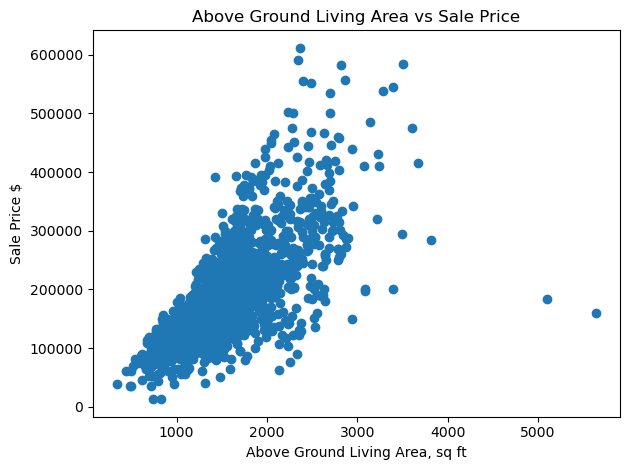

In [23]:
plt.scatter(df['Gr Liv Area'], df['SalePrice'])
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area, sq ft')
plt.ylabel('Sale Price $')
plt.tight_layout()
plt.savefig('living_area_price.png')
plt.show()

<AxesSubplot:xlabel='Lot Area', ylabel='Count'>

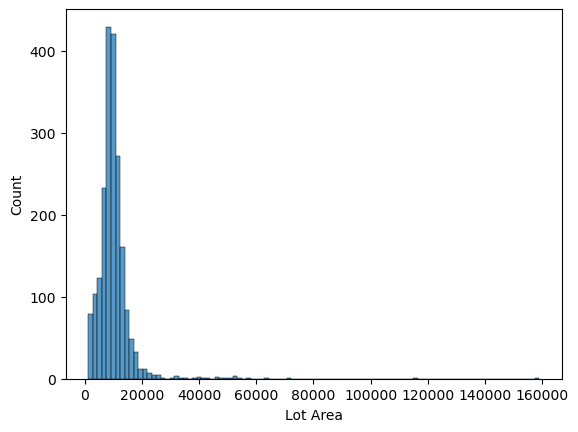

In [10]:
sns.histplot(df['Lot Area'], bins = 100)

Text(0, 0.5, 'Sale Price')

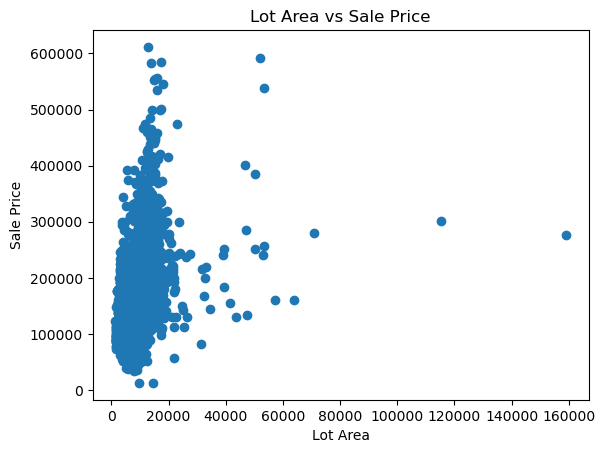

In [11]:
plt.scatter(df['Lot Area'], df['SalePrice'])
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

In [12]:
sub_10000 = df[df['Lot Area'] < 10000]

In [13]:
sub_10000.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
10,1044,527451290,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,COD,85400
11,2752,906380150,20,RL,64.0,7488,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,183600


<AxesSubplot:xlabel='Lot Area', ylabel='Count'>

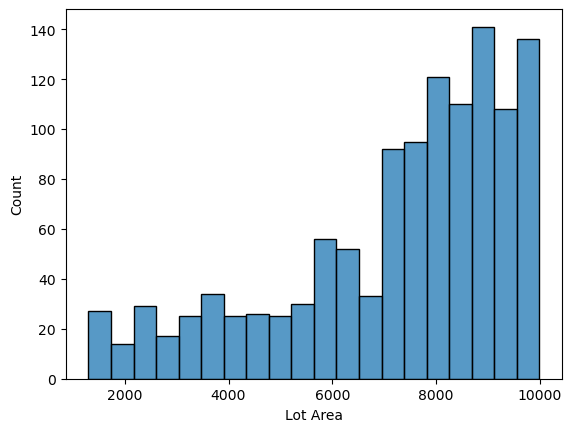

In [14]:
sns.histplot(sub_10000['Lot Area'], bins=20)

Text(0, 0.5, 'Sale Price')

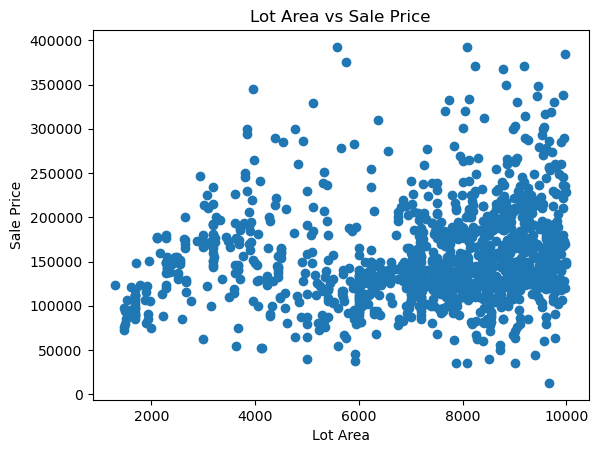

In [15]:
plt.scatter(sub_10000['Lot Area'], sub_10000['SalePrice'])
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

So from an initial first pass, we can see that there are various features, generally linked to square footage, which seems to correlate well with sale price. 

As the data is generally heavily right skewed across most categories, since we are dealing with some very large houses for example, we removed outliers, which gave us a slightly clearer picture of the correlation for that feature.

Year sold appears to matter little, which is odd as we would expect some impact from the financial crisis in 2008/09 but this isn't evident.

## Cleaning

Let's take a look at df.info() to get a sense of our data and where the nulls are. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

There are a number of categories with nulls that need attention. Let's tackle these one by one.

### Dealing with nulls

<AxesSubplot:xlabel='Lot Frontage', ylabel='Count'>

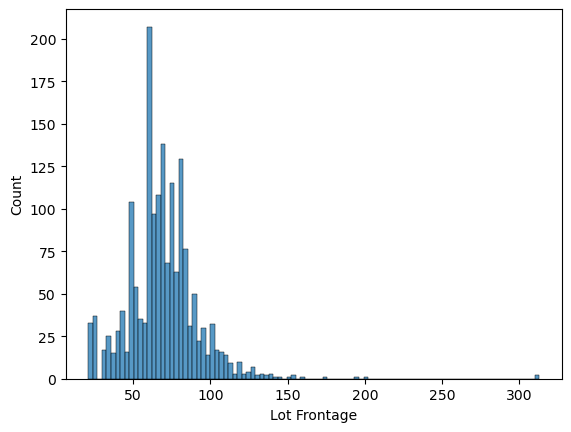

In [17]:
#Lot frontage
sns.histplot(df['Lot Frontage'], bins=100)

In [18]:
df[df['Lot Frontage'].isna()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,...,0,0,NaN,NaN,NaN,0,7,2008,WD,198000


It appears that the NaNs here are equivaluent to 0, or no lot frontage, so I am replaceing with 0

In [19]:
df['Lot Frontage'].fillna(0, inplace=True)

In [31]:
df[df['Lot Frontage'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


We will take the same approach for Alley, Masonry Veneer Type and Masonry Veneer Area, ie assume that NaN is equivalent to None and that values like area are 0.

<AxesSubplot:xlabel='Alley', ylabel='Count'>

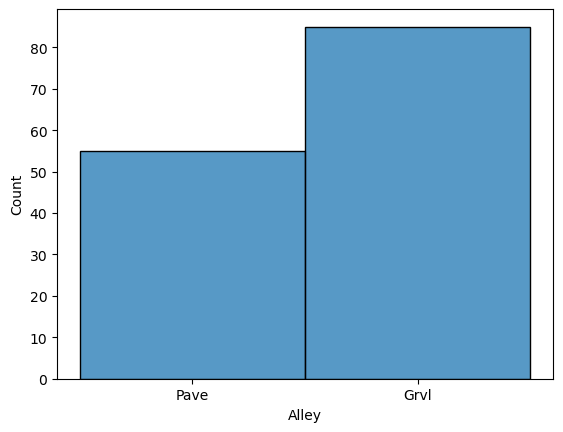

In [33]:
#Alley
sns.histplot(df['Alley'])

In [34]:
df['Alley'].fillna('None', inplace=True)

<AxesSubplot:xlabel='Mas Vnr Type', ylabel='Count'>

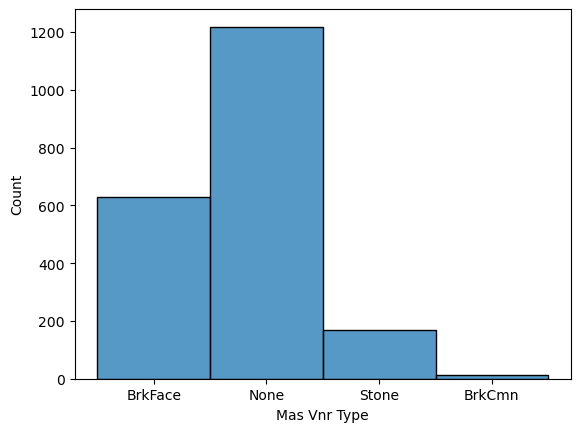

In [35]:
# Mas Vnr Type
sns.histplot(df['Mas Vnr Type'], bins=100)

In [37]:
df[df['Mas Vnr Type'].isna()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,None,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,None,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,None,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,None,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,None,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,117250


In [40]:
df['Mas Vnr Type'].fillna('None', inplace = True)
df[df['Mas Vnr Type'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


<AxesSubplot:xlabel='Mas Vnr Area', ylabel='Count'>

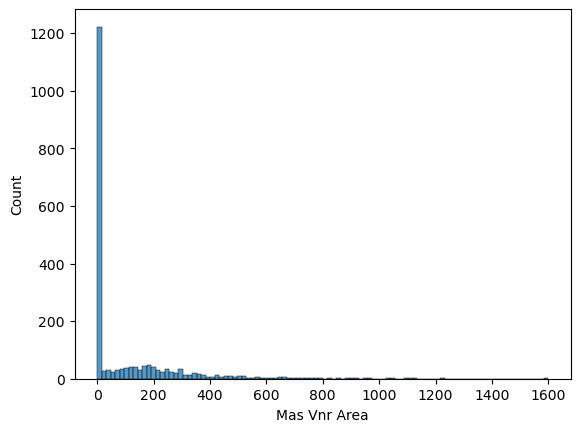

In [41]:
# Mas Vnr Area
sns.histplot(df['Mas Vnr Area'], bins=100)

In [42]:
df['Mas Vnr Area'].fillna(0, inplace = True)
df['Mas Vnr Area'].isna().sum()

0

## For Basement Quality, condition and square footage, let's assume no basement if NaN and therefore zero square footage. For other features, such as pool or number of of cars in garage, lets assume that nulls equate to zero.

In [48]:
len(df[df['Bsmt Qual'].isna()]['Bsmt Qual'])

55

<AxesSubplot:xlabel='Bsmt Qual', ylabel='Count'>

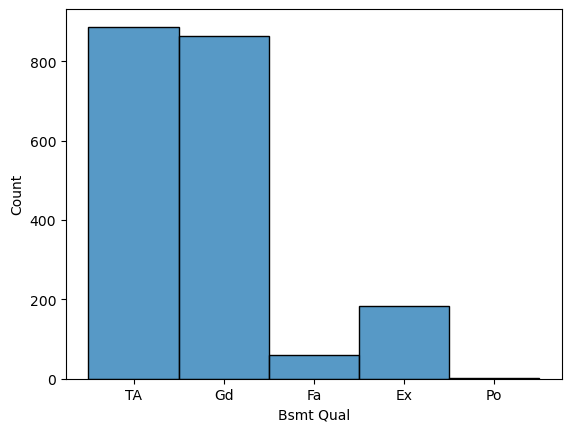

In [49]:
sns.histplot(df['Bsmt Qual'], bins=100)

In [50]:
df['Bsmt Qual'].fillna('None', inplace = True)

In [ ]:
len(df[df['Bsmt Cond'].isna()]['Bsmt Qual'])

<AxesSubplot:xlabel='Bsmt Cond', ylabel='Count'>

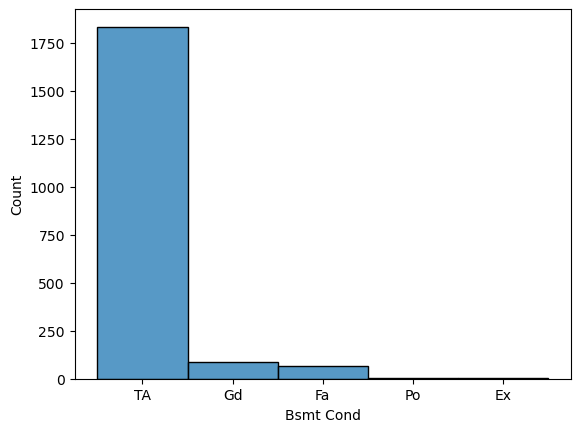

In [51]:
sns.histplot(df['Bsmt Cond'], bins=100)

In [52]:
df['Bsmt Cond'].fillna('None', inplace = True)

In [ ]:
len(df[df['Bsmt Exposure'].isna()]['Bsmt Qual'])

<AxesSubplot:xlabel='Bsmt Exposure', ylabel='Count'>

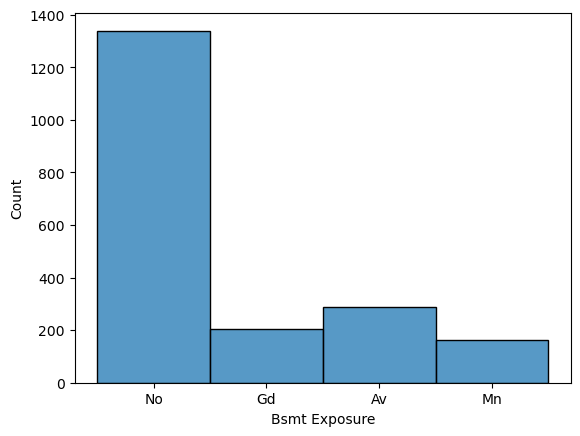

In [53]:
sns.histplot(df['Bsmt Exposure'], bins=100)

In [54]:
df['Bsmt Exposure'].fillna('None', inplace = True)

In [ ]:
len(df[df['BsmtFin SF 2'].isna()]['Bsmt Qual'])

<AxesSubplot:xlabel='BsmtFin SF 2', ylabel='Count'>

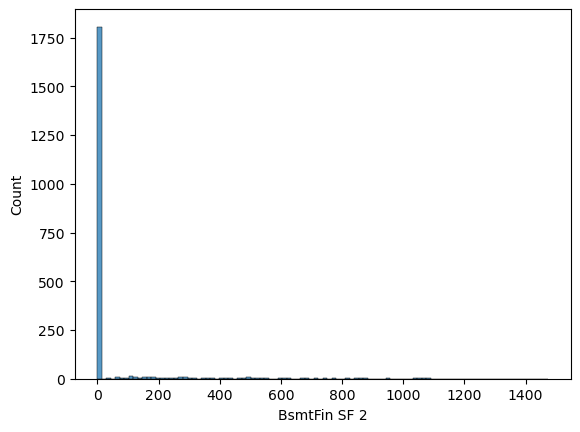

In [56]:
sns.histplot(df['BsmtFin SF 2'], bins=100)

In [57]:
df['BsmtFin SF 2'].fillna(0, inplace = True)

<AxesSubplot:xlabel='BsmtFin Type 1', ylabel='Count'>

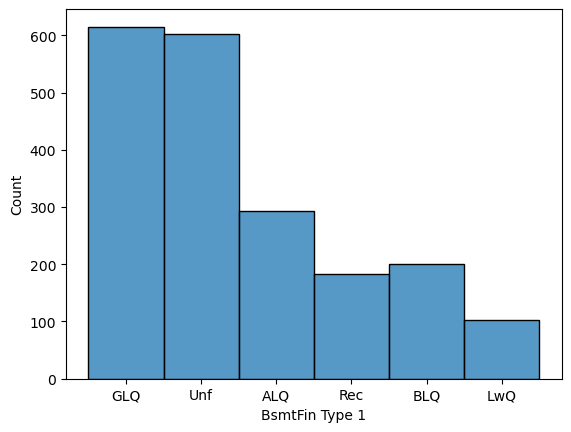

In [59]:
sns.histplot(df['BsmtFin Type 1'], bins=100)

In [60]:
df['BsmtFin Type 1'].fillna('None', inplace = True)

<AxesSubplot:xlabel='BsmtFin SF 1', ylabel='Count'>

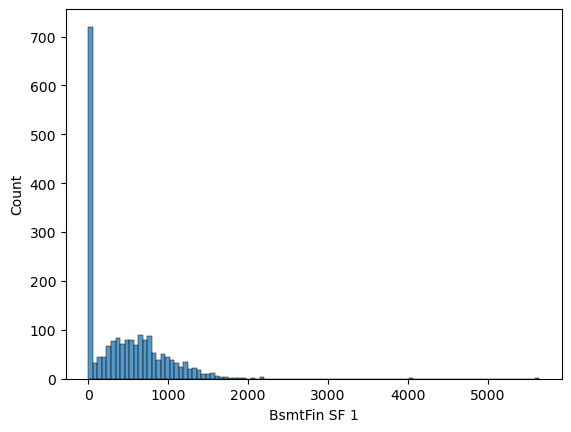

In [61]:
sns.histplot(df['BsmtFin SF 1'], bins=100)

In [62]:
df['BsmtFin SF 1'].fillna(0, inplace = True)

<AxesSubplot:xlabel='BsmtFin Type 2', ylabel='Count'>

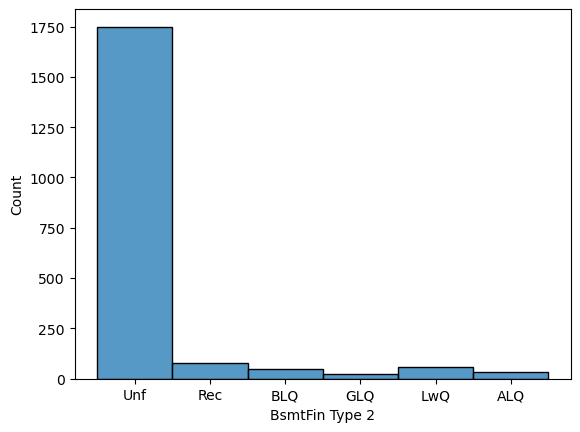

In [63]:
sns.histplot(df['BsmtFin Type 2'], bins=100)

In [64]:
df['BsmtFin Type 2'].fillna('None', inplace = True)

In [65]:
df['Bsmt Unf SF'].fillna(0, inplace = True)

In [66]:
df['Total Bsmt SF'].fillna(0, inplace = True)

<AxesSubplot:xlabel='Bsmt Full Bath', ylabel='Count'>

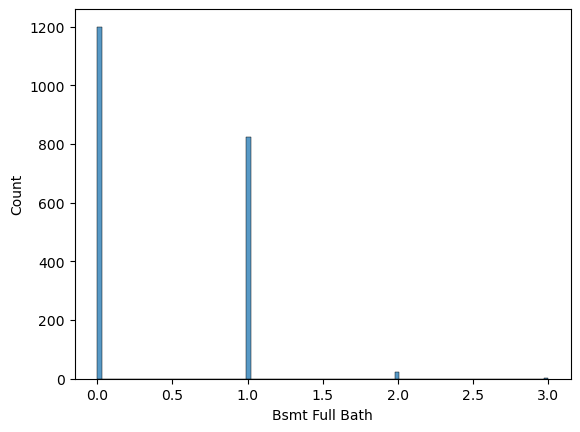

In [67]:
sns.histplot(df['Bsmt Full Bath'], bins=100)

In [68]:
df['Bsmt Full Bath'].fillna(0, inplace = True)

In [69]:
df['Bsmt Half Bath'].fillna(0, inplace = True)

<AxesSubplot:xlabel='Fireplace Qu', ylabel='Count'>

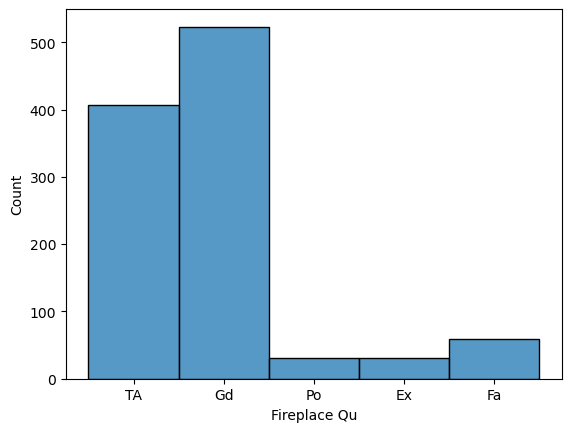

In [70]:
sns.histplot(df['Fireplace Qu'], bins=100)

In [329]:
df['Fireplace Qu'].fillna('None', inplace = True)

<AxesSubplot:xlabel='Garage Type', ylabel='Count'>

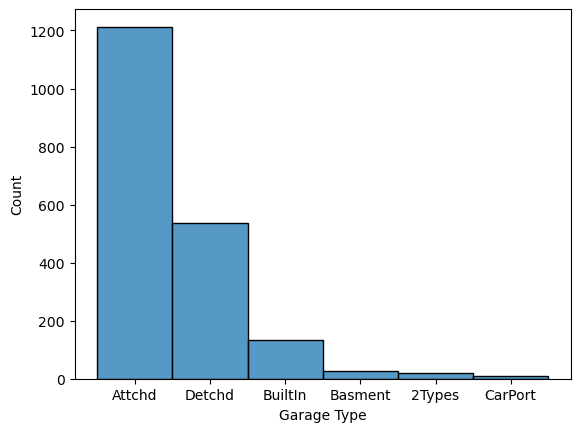

In [330]:
sns.histplot(df['Garage Type'], bins=100)

In [331]:
df['Garage Type'].fillna('None', inplace = True)

Below I have dealt with nulls in 'garage year built' by replacing with the mean of the series. This is preferable to assuming 0 given the distribution of the data across the last 100 years or so.

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='Count'>

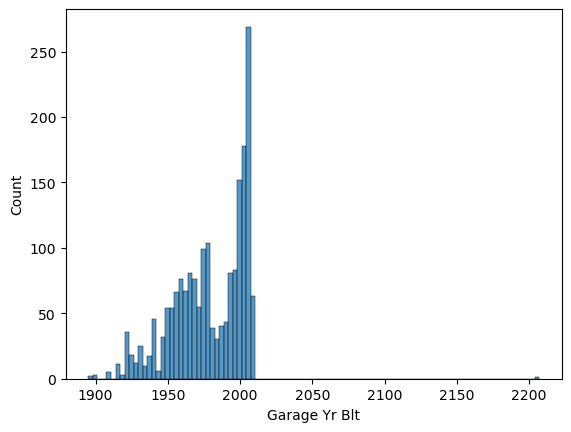

In [71]:
sns.histplot(df['Garage Yr Blt'], bins=100)

In [72]:
gyb = df['Garage Yr Blt'].mean()
df['Garage Yr Blt'].fillna(gyb, inplace = True)

<AxesSubplot:xlabel='Garage Finish', ylabel='Count'>

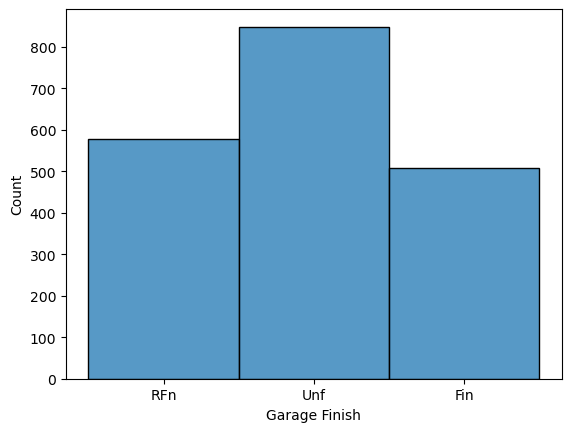

In [73]:
sns.histplot(df['Garage Finish'], bins=100)

In [74]:
df['Garage Finish'].fillna('None', inplace = True)

<AxesSubplot:xlabel='Garage Type', ylabel='Count'>

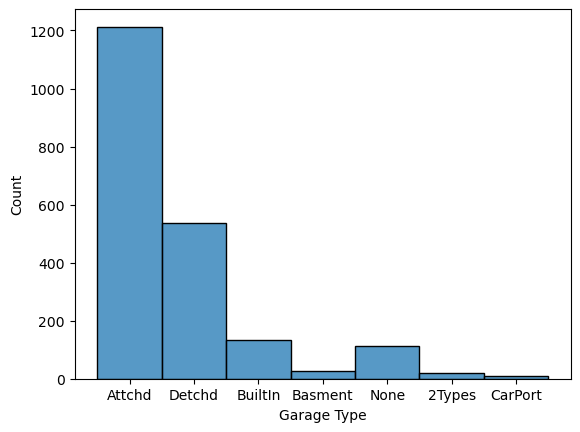

In [77]:
sns.histplot(df['Garage Type'], bins=100)

In [80]:
df['Garage Type'].fillna('None', inplace = True)

<AxesSubplot:xlabel='Garage Finish', ylabel='Count'>

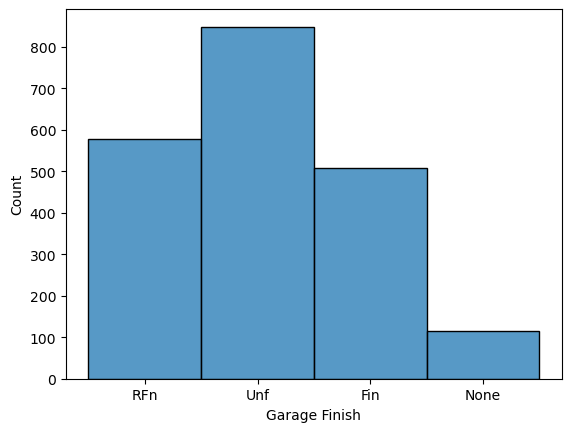

In [81]:
sns.histplot(df['Garage Finish'], bins=100)

In [82]:
df['Garage Cars'].fillna(0, inplace = True)
df['Garage Area'].fillna(0, inplace = True)

<AxesSubplot:xlabel='Garage Qual', ylabel='Count'>

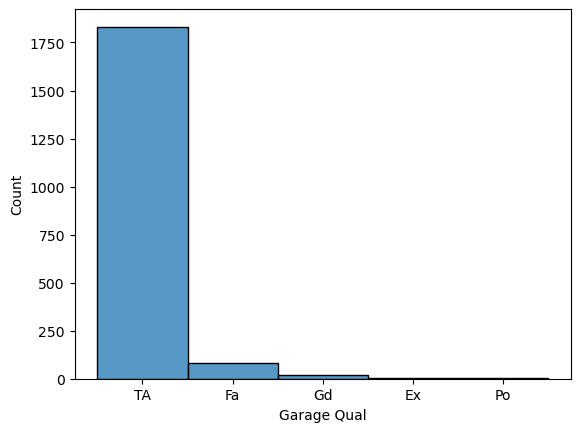

In [83]:
sns.histplot(df['Garage Qual'], bins=100)

<AxesSubplot:xlabel='Garage Cond', ylabel='Count'>

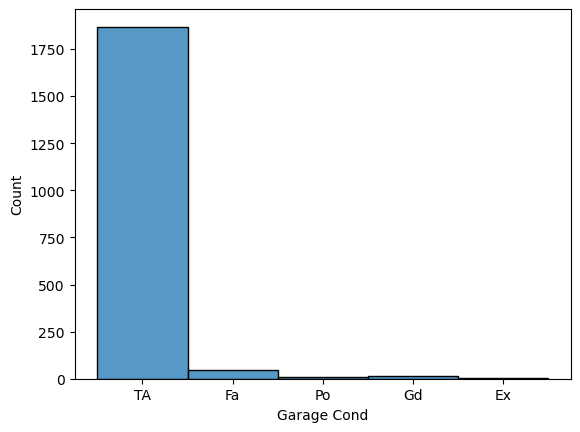

In [340]:
sns.histplot(df['Garage Cond'], bins=100)

In [84]:
df['Garage Qual'].fillna('None', inplace = True)
df['Garage Cond'].fillna('None', inplace = True)

<AxesSubplot:xlabel='Pool QC', ylabel='Count'>

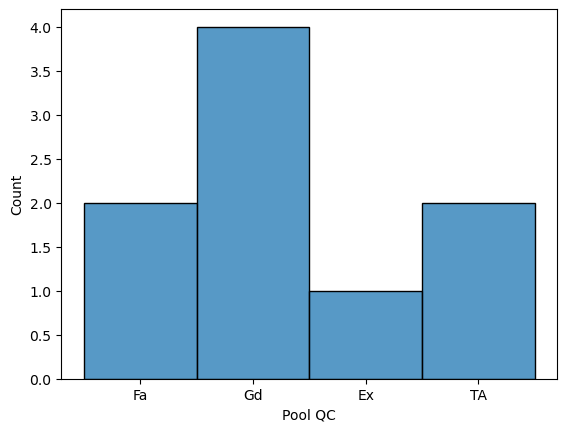

In [85]:
sns.histplot(df['Pool QC'], bins=100)

In [86]:
df['Pool QC'].fillna('None', inplace = True)

<AxesSubplot:xlabel='Fence', ylabel='Count'>

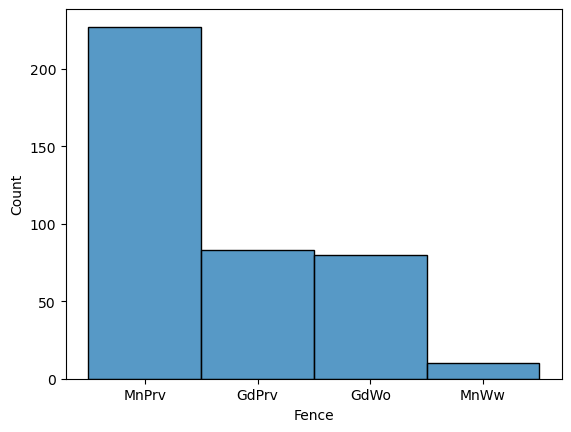

In [87]:
sns.histplot(df['Fence'], bins=100)

In [89]:
df['Fence'].fillna('None', inplace = True)

<AxesSubplot:xlabel='Misc Feature', ylabel='Count'>

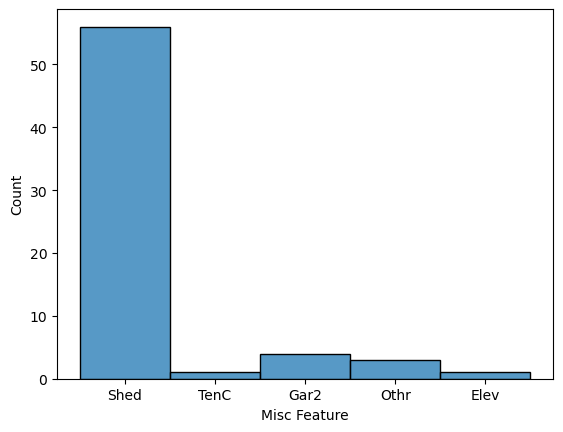

In [90]:
sns.histplot(df['Misc Feature'], bins=100)

In [92]:
df['Misc Feature'].fillna('None', inplace = True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

So we have now removed the null values and our data is ready for preprocessing. Let's save the dataframe as a csv so we can use it in our preprocessing sheet.

In [94]:
df.to_csv('clean_Ames_data.csv')

In [95]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500
